In [16]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

raw_df = pd.read_csv('aviasales_data_t (7).csv')
raw_df
iata_codes = ['MOW', 'LED', 'KZN', 'CEK', 'SVX', 'AER', 'KRR', 'KGD']    # Moscow, Saint Petersburg, Kazan, Chelyabinsk, Ekaterinburg, Sochi, Krasnodar, Kaliningrad
iata_codes_extra = ['SGC', 'OVB', 'VVO', 'YKS']      # Surgut, Novosibirsk, Vladivostok, Yakutsk
iata_codes_for_extra = ['MOW', 'LED', 'SVX']
df = raw_df.loc[raw_df['departure_at'] < '2021-04-01']

In [ ]:
#на самом деле эти три цикла делают одно и то же, но полеты между крупными пересадочными узлами и средними городами вынесены по отдельности (круп-сред, сред-круп, круп-круп)
for dest in iata_codes_extra:
  for orig in iata_codes_for_extra:
    print(orig,' ',dest)
    orig_dest = df.loc[(df['destination'] == dest) & (df['origin'] == orig)]
    sorted = orig_dest.sort_values(by=['departure_at', 'airline', 'requested_at'])
    cur_price = 10000000
    depart = ''
    airline = ''
    for index, row in sorted.iterrows():
      if (int(row['price']) < cur_price - 500) and (row['departure_at'] == depart) and (row['airline'] == airline): #на маленькие ценовые изменения забиваем
        print(row['price'],' ',cur_price, cur_price-int(row['price']))
      depart = row['departure_at']
      cur_price = int(row['price'])
      airline = row['airline']
    

for orig in iata_codes_extra:
  for dest in iata_codes_for_extra:
    print(orig,' ',dest)
    orig_dest = df.loc[(df['destination'] == dest) & (df['origin'] == orig)]
    sorted = orig_dest.sort_values(by=['departure_at', 'airline', 'requested_at']) 
    cur_price = 10000000
    depart = ''
    airline = ''
    for index, row in sorted.iterrows():
      if (int(row['price']) < cur_price - 500) and (row['departure_at'] == depart) and (row['airline'] == airline): #на маленькие ценовые изменения забиваем
        print(row['price'],' ',cur_price, cur_price-int(row['price']))
      depart = row['departure_at']
      cur_price = int(row['price'])
      airline = row['airline']


for dest in iata_codes:
  for orig in iata_codes:
    print(orig,' ',dest)
    orig_dest = df.loc[(df['destination'] == dest) & (df['origin'] == orig)]
    sorted = orig_dest.sort_values(by=['departure_at', 'airline', 'requested_at'])
    cur_price = 10000000
    depart = ''
    airline = ''
    for index, row in sorted.iterrows():
      if (int(row['price']) < cur_price - 500) and (row['departure_at'] == depart) and (row['airline'] == airline): #на маленькие ценовые изменения забиваем
        print(row['price'],' ',cur_price, cur_price-int(row['price']))
      depart = row['departure_at']
      cur_price = int(row['price'])
      airline = row['airline']


MOW  - SVX


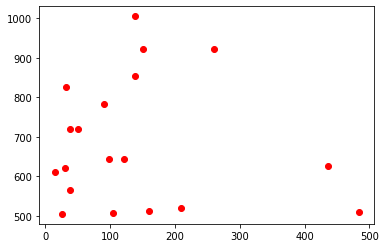

LED  - SVX


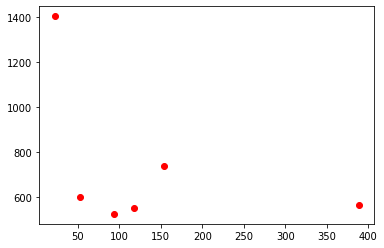

KZN  - SVX


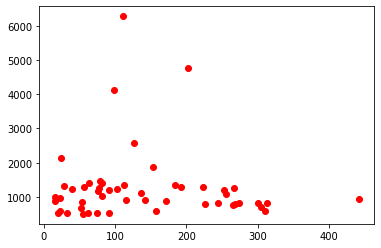

CEK  - SVX


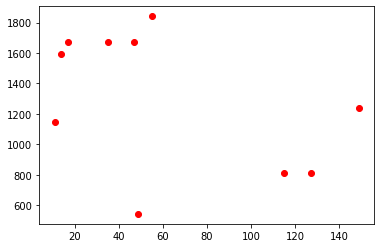

SVX  - SVX


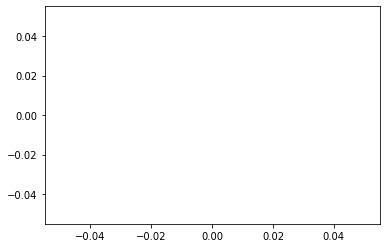

AER  - SVX


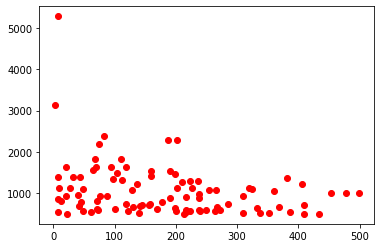

KRR  - SVX


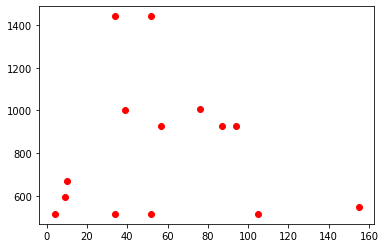

KGD  - SVX


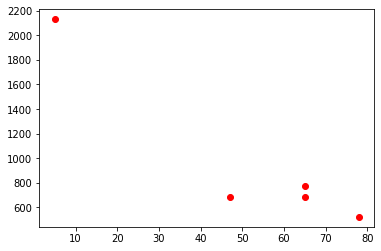

In [17]:

dest = 'SVX' #это тот же цикл, что и сверху, но для просмотра полетов из(в) конкретного аэропорта
counter = 0
for orig in iata_codes:
  changes = pd.DataFrame(columns=['origin', 'difference', 'departure_at', 'requested_at', 'until_dep'])
  orig_dest = df.loc[(df['destination'] == dest) & (df['origin'] == orig)]
  sorted = orig_dest.sort_values(by=['departure_at', 'airline', 'requested_at'])
  cur_price = 10000000
  depart = ''
  airline = ''
  for index, row in sorted.iterrows():
    if (int(row['price']) < cur_price - 500) and (row['departure_at'] == depart) and (row['airline'] == airline): #на маленькие ценовые изменения забиваем
       #print(row['price'],' ',cur_price, cur_price-int(row['price']))
       departure_at = datetime.datetime.strptime(row['departure_at'], "%Y-%m-%dT%H:%M:%SZ")
       requested_at = datetime.datetime.strptime(row['requested_at'], "%y-%m-%dT%H:%M:%SZ")
       changes.loc[counter] = [orig, cur_price-int(row['price']), departure_at, requested_at, departure_at - requested_at]
       counter += 1
    depart = row['departure_at']
    cur_price = int(row['price'])
    airline = row['airline']
  print(orig, ' - SVX')
  plt.plot(changes['until_dep'].astype('timedelta64[h]'), changes['difference'], 'ro')
  plt.show()

,origin,destination,difference,new_price,departure_at,requested_at,until_dep
0,AER,SVX,77,14339,2021-03-08 13:55:00,2021-03-06 16:05:28,1 days 21:49:32
1,AER,SVX,-1,14340,2021-03-08 13:55:00,2021-03-07 00:43:58,1 days 13:11:02
2,AER,SVX,138,14577,2021-03-09 16:50:00,2021-03-08 00:29:40,1 days 16:20:20
3,AER,SVX,-75,13089,2021-03-09 17:25:00,2021-03-06 16:05:28,3 days 01:19:32
4,AER,SVX,-1695,14784,2021-03-09 17:25:00,2021-03-07 00:43:58,2 days 16:41:02
...,...,...,...,...,...,...,...
407,AER,SVX,1086,10037,2021-03-31 21:05:00,2021-03-20 18:30:02,11 days 02:34:58
408,AER,SVX,-1086,11123,2021-03-31 21:05:00,2021-03-21 00:30:02,10 days 20:34:58
409,AER,SVX,1086,10037,2021-03-31 21:05:00,2021-03-21 06:30:02,10 days 14:34:58
410,AER,SVX,-3077,13114,2021-03-31 21:05:00,2021-03-30 18:30:03,1 days 02:34:57


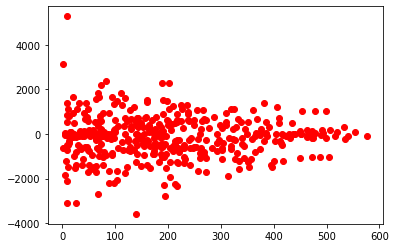

In [19]:
dest = 'SVX'
orig = 'AER'
changes = pd.DataFrame(columns=['origin', 'destination', 'difference', 'new_price', 'departure_at', 'requested_at', 'until_dep'])
counter = 0
orig_dest = df.loc[(df['destination'] == dest) & (df['origin'] == orig)]
sorted = orig_dest.sort_values(by=['departure_at', 'airline', 'requested_at'])
cur_price = 10000000
depart = ''
airline = ''
for index, row in sorted.iterrows():
  if (int(row['price']) != cur_price) and (row['departure_at'] == depart) and (row['airline'] == airline):
    #print(row['price'],' ',cur_price, cur_price-int(row['price']))
    departure_at = datetime.datetime.strptime(row['departure_at'], "%Y-%m-%dT%H:%M:%SZ")
    requested_at = datetime.datetime.strptime(row['requested_at'], "%y-%m-%dT%H:%M:%SZ")
    changes.loc[counter] = [orig, dest, cur_price-int(row['price']), int(row['price']), departure_at, requested_at, departure_at - requested_at]
    counter += 1
  depart = row['departure_at']
  cur_price = int(row['price'])    
  airline = row['airline']
plt.plot(changes['until_dep'].astype('timedelta64[h]'), changes['difference'], 'ro')
changes